# 4 Pre-Processing and Training Data<a id='4_Pre-Processing_and_Training_Data'></a>

In [ ]:
## 4.1 Contents<a id='4.1_Contents'></a>
* [4 Pre-Processing and Training Data](#4_Pre-Processing_and_Training_Data)
  * [4.1 Contents](#4.1_Contents)
  * [4.2 Introduction](#4.2_Introduction)
  * [4.3 Imports](#4.3_Imports)
  * [4.4 Load Data](#4.4_Load_Data)
  * [4.5 Choosing Models and Lags](#4.5_Choosing_Models_and_Lags)
    * [4.5.1 Africa Subset COVID-19 Distribution](#4.5.1_Africa_Subset_COVID-19_Distribution)
    * [4.5.2 Asia Subset COVID-19 Distribution](#4.5.2_Asia_Subset_COVID-19_Distribution)
    * [4.5.3 Europe Subset COVID-19 Distribution](#4.5.3_Europe_Subset_COVID-19_Distribution)
    * [4.5.4 E Subset COVID-19 Distribution](#4.5.4_Europe_Subset_COVID-19_Distribution)
  * [4.6 Active and Recovered COVID-19 cases by Continent](#4.6_Active_and_Recovered_COVID-19_Cases_by_Continent)
  * [4.6 Train/Test Split](#4.6_Train/Test_Split)
  * [4.7 Initial Not-Even-A-Model](#4.7_Initial_Not-Even-A-Model)
    * [4.7.1 Metrics](#4.7.1_Metrics)
      * [4.7.1.1 R-squared, or coefficient of determination](#4.7.1.1_R-squared,_or_coefficient_of_determination)
      * [4.7.1.2 Mean Absolute Error](#4.7.1.2_Mean_Absolute_Error)
      * [4.7.1.3 Mean Squared Error](#4.7.1.3_Mean_Squared_Error)
    * [4.7.2 sklearn metrics](#4.7.2_sklearn_metrics)
        * [4.7.2.0.1 R-squared](#4.7.2.0.1_R-squared)
        * [4.7.2.0.2 Mean absolute error](#4.7.2.0.2_Mean_absolute_error)
        * [4.7.2.0.3 Mean squared error](#4.7.2.0.3_Mean_squared_error)
    * [4.7.3 Note On Calculating Metrics](#4.7.3_Note_On_Calculating_Metrics)
  * [4.8 Initial Models](#4.8_Initial_Models)
    * [4.8.1 Imputing missing feature (predictor) values](#4.8.1_Imputing_missing_feature_(predictor)_values)
      * [4.8.1.1 Impute missing values with median](#4.8.1.1_Impute_missing_values_with_median)
        * [4.8.1.1.1 Learn the values to impute from the train set](#4.8.1.1.1_Learn_the_values_to_impute_from_the_train_set)
        * [4.8.1.1.2 Apply the imputation to both train and test splits](#4.8.1.1.2_Apply_the_imputation_to_both_train_and_test_splits)
        * [4.8.1.1.3 Scale the data](#4.8.1.1.3_Scale_the_data)
        * [4.8.1.1.4 Train the model on the train split](#4.8.1.1.4_Train_the_model_on_the_train_split)
        * [4.8.1.1.5 Make predictions using the model on both train and test splits](#4.8.1.1.5_Make_predictions_using_the_model_on_both_train_and_test_splits)
        * [4.8.1.1.6 Assess model performance](#4.8.1.1.6_Assess_model_performance)
      * [4.8.1.2 Impute missing values with the mean](#4.8.1.2_Impute_missing_values_with_the_mean)
        * [4.8.1.2.1 Learn the values to impute from the train set](#4.8.1.2.1_Learn_the_values_to_impute_from_the_train_set)
        * [4.8.1.2.2 Apply the imputation to both train and test splits](#4.8.1.2.2_Apply_the_imputation_to_both_train_and_test_splits)
        * [4.8.1.2.3 Scale the data](#4.8.1.2.3_Scale_the_data)
        * [4.8.1.2.4 Train the model on the train split](#4.8.1.2.4_Train_the_model_on_the_train_split)
        * [4.8.1.2.5 Make predictions using the model on both train and test splits](#4.8.1.2.5_Make_predictions_using_the_model_on_both_train_and_test_splits)
        * [4.8.1.2.6 Assess model performance](#4.8.1.2.6_Assess_model_performance)
    * [4.8.2 Pipelines](#4.8.2_Pipelines)
      * [4.8.2.1 Define the pipeline](#4.8.2.1_Define_the_pipeline)
      * [4.8.2.2 Fit the pipeline](#4.8.2.2_Fit_the_pipeline)
      * [4.8.2.3 Make predictions on the train and test sets](#4.8.2.3_Make_predictions_on_the_train_and_test_sets)
      * [4.8.2.4 Assess performance](#4.8.2.4_Assess_performance)
  * [4.9 Refining The Linear Model](#4.9_Refining_The_Linear_Model)
    * [4.9.1 Define the pipeline](#4.9.1_Define_the_pipeline)
    * [4.9.2 Fit the pipeline](#4.9.2_Fit_the_pipeline)
    * [4.9.3 Assess performance on the train and test set](#4.9.3_Assess_performance_on_the_train_and_test_set)
    * [4.9.4 Define a new pipeline to select a different number of features](#4.9.4_Define_a_new_pipeline_to_select_a_different_number_of_features)
    * [4.9.5 Fit the pipeline](#4.9.5_Fit_the_pipeline)
    * [4.9.6 Assess performance on train and test data](#4.9.6_Assess_performance_on_train_and_test_data)
    * [4.9.7 Assessing performance using cross-validation](#4.9.7_Assessing_performance_using_cross-validation)
    * [4.9.8 Hyperparameter search using GridSearchCV](#4.9.8_Hyperparameter_search_using_GridSearchCV)
  * [4.10 Random Forest Model](#4.10_Random_Forest_Model)
    * [4.10.1 Define the pipeline](#4.10.1_Define_the_pipeline)
    * [4.10.2 Fit and assess performance using cross-validation](#4.10.2_Fit_and_assess_performance_using_cross-validation)
    * [4.10.3 Hyperparameter search using GridSearchCV](#4.10.3_Hyperparameter_search_using_GridSearchCV)
  * [4.11 Final Model Selection](#4.11_Final_Model_Selection)
    * [4.11.1 Linear regression model performance](#4.11.1_Linear_regression_model_performance)
    * [4.11.2 Random forest regression model performance](#4.11.2_Random_forest_regression_model_performance)
    * [4.11.3 Conclusion](#4.11.3_Conclusion)
  * [4.12 Data quantity assessment](#4.12_Data_quantity_assessment)
  * [4.13 Save best model object from pipeline](#4.13_Save_best_model_object_from_pipeline)
  * [4.14 Summary](#4.14_Summary)


## 4.2 Introduction<a id='4.2_Introduction'></a>

Time series analysis has some things in common with discussion of probability and regression
* In many cases, we can describe parts of time series processes in terms of a randomized variable with statistical moments, though an important feature of many time series processes is that their mean and/or variance change through time. 
* Like regression, time series analysis is often focused on identifying underlying trends and patterns, describing them mathematically, and ultimately making a prediction or forecast about what will happen next.  
In this instance the data can be modeled to identify the trends for active and recovered patients. A big part of this time series analysis will involve filtering - i.e. changing attributes of a time series or deconstructing it into it's component parts.  



## 4.3 Imports<a id='4.3_Imports'></a>

In [253]:
import pandas as pd 
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import __version__ as sklearn_version
from statsmodels.tsa.arima_model import ARIMA
from statsmodels import __version__ as statsmodels_version
import pickle
import datetime
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates


## 4.4 Load Data<a id='4.4_Load_Data'></a>

In [105]:
af_df = pd.read_csv('../data/mor_df.csv',  index_col=0)
asia_df = pd.read_csv('../data/asia_df.csv',  index_col=0)
eu_df = pd.read_csv('../data/eu_df.csv',  index_col=0)
noam_df = pd.read_csv('../data/noam_df.csv',  index_col=0)
soam_df = pd.read_csv('../data/soam_df.csv',  index_col=0)

## 4.5 Choosing Models and Lags<a id='4.5_Choosing_Models_and_Lags'></a>

The Augmented dickey Fuller Test (ADF) is a unit root test for stationarity. Unit roots can cause unpredictable results in your time series analysis, it should be used with caution because it has a high Type I error rate. The type I error (false positive). So in this case it would be identifying more recovered and active cases per country, a cautious approach to disease transmission. 

Before running the ADF test, the data must be inspected to figure out an appropriate regression model. A nonzero mean indicates the regression will have a constant term. The three basic regression models are: 

* No constant, no trend: $ \Delta y_t = \gamma y_{t-1} + v_t $
* Constant, no trend: $ \Delta y_t = \alpha + \gamma y_{t-1} + v_t $
* Constant and trend: $ \Delta y_t = \alpha + \gamma y_{t-1} + \lambda_t + v_t $

### 4.5.1 Africa Subset COVID-19 Data Distribution<a id='4.5.1_Africa_Subset_COVID-19_Data_Distribution'></a>

In [318]:
af_df['date'] = pd.to_datetime(af_df['date'])
af = af_df[['date','active','recovered']].groupby(pd.Grouper(key='date', axis=0, freq='1D', sort=True)).sum()
af[180:220] = af[180:220].replace(to_replace=0, method='ffill')
af.describe()

,active,recovered
count,305.000000,305.000000
mean,14360.632787,87886.806557
std,15302.152060,120415.005947
min,1.000000,0.000000
25%,2148.000000,3660.000000
50%,6688.000000,17960.000000
75%,24726.000000,138989.000000
max,49800.000000,407504.000000


### 4.5.2 Asia Subset COVID-19 Data Distribution<a id='4.5.2_Asia_Subset_COVID-19_Data_Distribution'></a>

In [323]:
asia_df['date'] = pd.to_datetime(asia_df.index)
asia = asia_df[['date','active','recovered']].groupby(pd.Grouper(key='date', axis=0, freq='1D', sort=True)).sum()
asia[220:280] = asia[220:280].replace(to_replace=0, method='ffill')
asia.describe()

,active,recovered
count,3.450000e+02,3.450000e+02
mean,5.010584e+05,3.524378e+06
std,4.137152e+05,4.298139e+06
min,5.020000e+02,2.800000e+01
25%,1.025040e+05,9.358400e+04
50%,4.680090e+05,1.020034e+06
75%,8.346950e+05,6.936160e+06
max,1.859050e+06,1.367231e+07


### 4.5.3 Europe Subset COVID-19 Data Distribution<a id='4.5.3_Europe_Subset_COVID-19_Data_Distribution'></a>

In [328]:
eu_df['date'] = pd.to_datetime(eu_df.index)
eu = eu_df[['date','active','recovered']].groupby(pd.Grouper(key='date', axis=0, freq='1D', sort=True)).sum()
eu[210:250] = eu[210:250].replace(to_replace=0, method='ffill')
eu.describe()

,active,recovered
count,3.430000e+02,3.430000e+02
mean,1.881143e+06,1.476253e+06
std,2.448128e+06,1.594351e+06
min,0.000000e+00,0.000000e+00
25%,5.011070e+05,2.502625e+05
50%,6.943510e+05,1.141371e+06
75%,2.040702e+06,1.820758e+06
max,8.276404e+06,6.733676e+06


### 4.5.4 North America Subset COVID-19 Data Distribution<a id='4.5.4_North_America_Subset_COVID-19_Data_Distribution'></a>

In [331]:
noam_df['date'] = pd.to_datetime(noam_df.index)
noam = noam_df[['date','active','recovered']].groupby(pd.Grouper(key='date', axis=0, freq='1D', sort=True)).sum()
noam[215:255] = noam[215:255].replace(to_replace=0, method='ffill')
noam.describe()

,active,recovered
count,3.450000e+02,3.450000e+02
mean,3.458393e+06,1.909900e+06
std,4.213188e+06,2.030544e+06
min,0.000000e+00,0.000000e+00
25%,6.289880e+05,7.121500e+04
50%,2.220813e+06,1.314575e+06
75%,4.388998e+06,3.289584e+06
max,1.992028e+07,7.712306e+06


### 4.5.5 South America Subset COVID-19 Data Distribution<a id='4.5.5_South_America_Subset_COVID-19_Data_Distribution'></a>

In [336]:
soam_df['date'] = pd.to_datetime(soam_df.index)
soam = soam_df[['date','active','recovered']].groupby(pd.Grouper(key='date', axis=0, freq='1D', sort=True)).sum()
soam[215:255] = soam[215:255].replace(to_replace=0, method='ffill')
soam.describe()

,active,recovered
count,344.000000,3.440000e+02
mean,332783.465116,2.437042e+06
std,241025.200159,2.494714e+06
min,0.000000,0.000000e+00
25%,24135.750000,1.795750e+04
50%,413141.000000,1.563276e+06
75%,542086.750000,4.882875e+06
max,759826.000000,7.426226e+06


## 4.6 Active and Recovered COVID-19 cases by Continent<a id='4.6_Active_and_Recovered_COVID-19_Cases_by_Continent'></a>

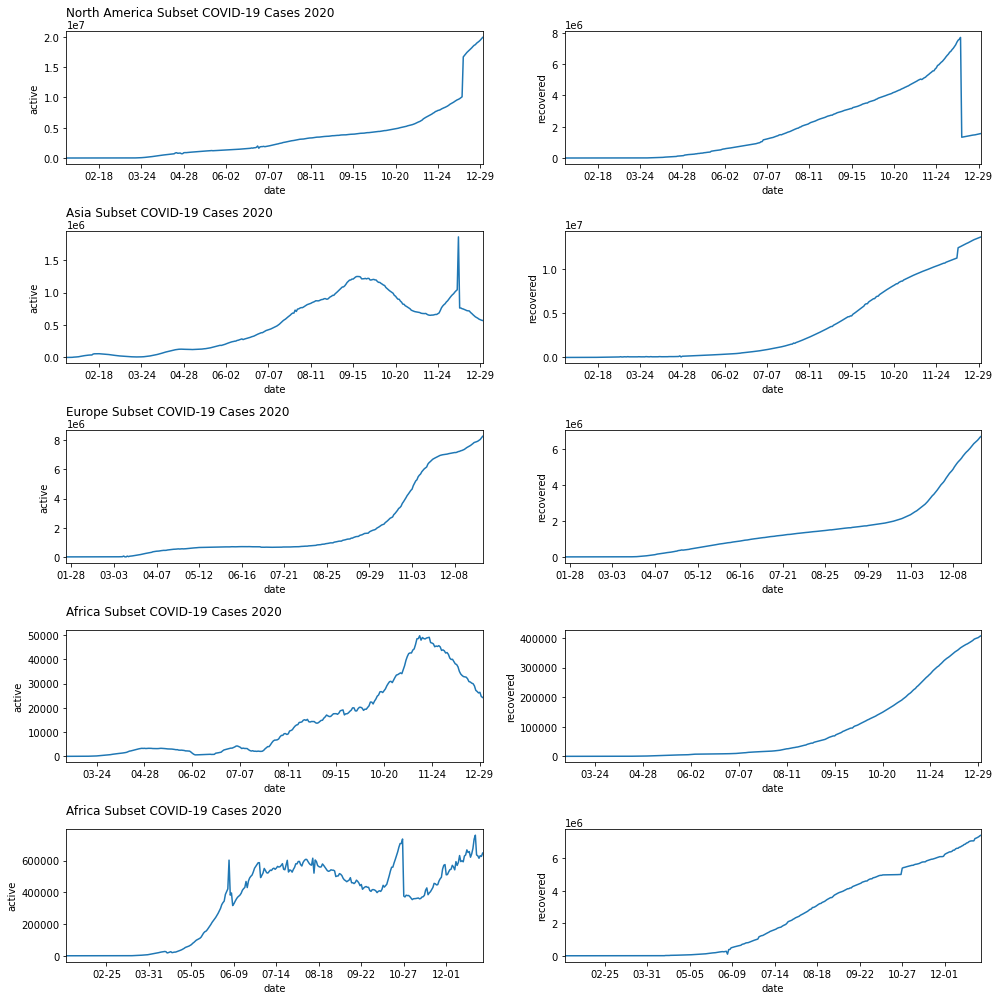

In [338]:
fig, axes = plt.subplots(5, 2, figsize=(14, 14))

# Define the date format
date_form = DateFormatter("%m-%d")

# plotting subplots
sns.lineplot(ax=axes[0,0], data=noam, x='date', y='active', ci=95)
axes[0, 0].set_title('North America Subset COVID-19 Cases 2020', loc='left', pad=15)
axes[0, 0].margins(x=0)
axes[0, 0].xaxis.set_major_formatter(date_form)
axes[0, 0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
sns.lineplot(ax=axes[0,1], data=noam, x='date', y='recovered', ci=95)
axes[0, 1].margins(x=0)
axes[0, 1].xaxis.set_major_formatter(date_form)
axes[0, 1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
sns.lineplot(ax=axes[1,0], data=asia, x='date', y='active', ci=95)
axes[1, 0].set_title('Asia Subset COVID-19 Cases 2020', loc='left', pad=15)
axes[1, 0].margins(x=0)
axes[1, 0].xaxis.set_major_formatter(date_form)
axes[1, 0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
sns.lineplot(ax=axes[1, 1], data=asia, x='date', y='recovered', ci=95)
axes[1, 1].margins(x=0)
axes[1, 1].xaxis.set_major_formatter(date_form)
axes[1, 1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
sns.lineplot(ax=axes[2, 0], data=eu, x='date', y='active', ci=95)
axes[2, 0].set_title('Europe Subset COVID-19 Cases 2020', loc='left', pad=15)
axes[2, 0].margins(x=0)
axes[2, 0].xaxis.set_major_formatter(date_form)
axes[2, 0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
sns.lineplot(ax=axes[2, 1], data=eu, x='date', y='recovered', ci=95)
axes[2, 1].margins(x=0)
axes[2, 1].xaxis.set_major_formatter(date_form)
axes[2, 1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
sns.lineplot(ax=axes[3, 0], data=af, x='date', y='active', ci=95)
axes[3, 0].set_title('Africa Subset COVID-19 Cases 2020', loc='left', pad=15)
axes[3, 0].margins(x=0)
axes[3, 0].xaxis.set_major_formatter(date_form)
axes[3, 0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
sns.lineplot(ax=axes[3, 1], data=af, x='date', y='recovered', ci=95)
axes[3, 1].margins(x=0)
axes[3, 1].xaxis.set_major_formatter(date_form)
axes[3, 1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
sns.lineplot(ax=axes[4, 0], data=soam, x='date', y='active', ci=95)
axes[4, 0].set_title('Africa Subset COVID-19 Cases 2020', loc='left', pad=15)
axes[4, 0].margins(x=0)
axes[4, 0].xaxis.set_major_formatter(date_form)
axes[4, 0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
sns.lineplot(ax=axes[4, 1], data=soam, x='date', y='recovered', ci=95)
axes[4, 1].margins(x=0)
axes[4, 1].xaxis.set_major_formatter(date_form)
axes[4, 1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))


# automatically adjust padding horizontally
# as well as vertically.
plt.tight_layout()
 
# display plot
plt.show()

To run the ADF test we need to chose a lag length so that the residuals aren't serially correlated (aka Autocorrelation), this is where error terms in a time series transfer from one period to another.  

In general, a p-value of less than 5% means you can reject the null hyptohesis that there is a unit root. In this case we want to ensure that there are no values that can lead to unpredictable results in the time series. The alternate hypothesis for this data is that the time series *IS* stationary (or trend stationary) 



In [296]:
result = adfuller(af['recovered'])
result1 = adfuller(af['active'])

In [297]:
print('Africa Sample Recovered ADF Statistic:', result[0])

print('Africa Sample Recovered p-value:', result[1])

print('Africa Sample Recovered critical values:', result[4])

Africa Sample Recovered ADF Statistic: 1.6768258532462732
Africa Sample Recovered p-value: 0.9980706956575527
Africa Sample Recovered critical values: {'1%': -3.453261605529366, '5%': -2.87162848654246, '10%': -2.5721455328896603}


In [298]:
print('Africa Sample Active ADF Statistic:', result1[0])

print('Africa Sample Active p-value:', result1[1])

print('Africa Sample Active critical values:', result1[4])

Africa Sample Active ADF Statistic: -1.8088546149339009
Africa Sample Active p-value: 0.3760745689248099
Africa Sample Active critical values: {'1%': -3.453261605529366, '5%': -2.87162848654246, '10%': -2.5721455328896603}


In [7]:
af_active = af.active.diff().diff().dropna()
result2 = adfuller(af_active)

In [8]:
print('Africa Sample Active ADF Statistic:', result2[0])

print('Africa Sample Active p-value:', result2[1])

print('Africa Sample Active critical values:', result2[4])

Africa Sample Active ADF Statistic: -16.48063029968488
Africa Sample Active p-value: 2.238919394676565e-29
Africa Sample Active critical values: {'1%': -3.452789844280995, '5%': -2.871421512222641, '10%': -2.5720351510944512}


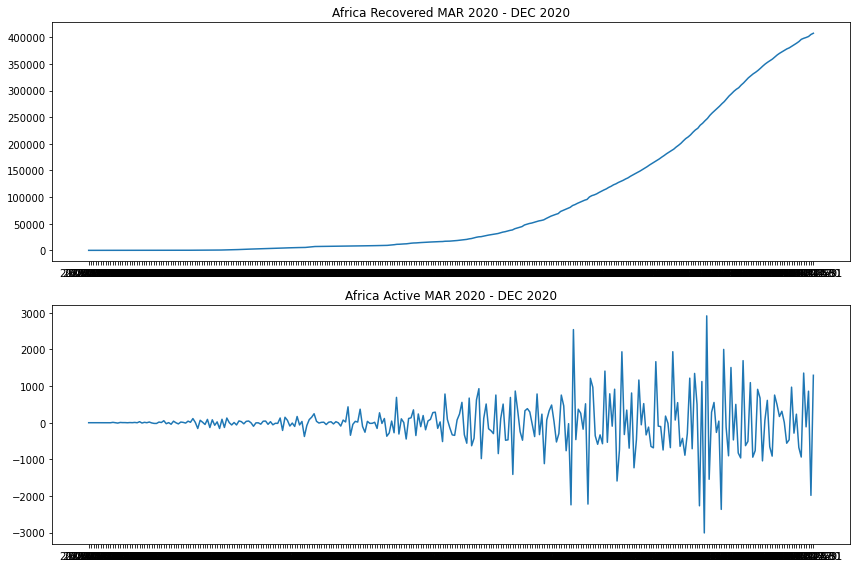

In [9]:
# creating grid for subplots
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(12)

ax1 = plt.subplot2grid(shape=(2, 1), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(2, 1), loc=(1, 0))

# plotting subplots
ax1.plot(af_df['recovered'])
ax1.set_title('Africa Recovered MAR 2020 - DEC 2020')
ax2.plot(af_active)
ax2.set_title('Africa Active MAR 2020 - DEC 2020') 

# automatically adjust padding horizontally
# as well as vertically.
plt.tight_layout()

# display plot
plt.show()

In [10]:
asia_df.head()

,country,confirmed,deaths,recovered,active,log_converted_confirmed,log_converted_deaths,log_converted_recovered,log_converted_active
date,,,,,,,,,
2020-03-02,Indonesia,2,0.0,0.0,2.0,-1.651211,-1.216878,-0.287585,-0.078741
2020-03-02,Indonesia,2,0.0,0.0,2.0,-1.651211,-1.216878,-0.287585,-0.078741
2020-03-02,Indonesia,2,0.0,0.0,2.0,-1.651211,-1.216878,-0.287585,-0.078741
2020-03-02,Indonesia,2,0.0,0.0,2.0,-1.651211,-1.216878,-0.287585,-0.078741
2020-03-06,Indonesia,4,0.0,0.0,4.0,-1.455649,-1.216878,-0.287585,-0.078695


In [11]:
asia_df = asia_df.groupby('date')[['confirmed', 'deaths', 'recovered', 'active']].sum()
asia_df.head()

,confirmed,deaths,recovered,active
date,,,,
2020-01-22,547,17.0,28.0,502.0
2020-01-23,639,18.0,30.0,591.0
2020-01-24,916,26.0,36.0,854.0
2020-01-25,1399,42.0,39.0,1318.0
2020-01-26,2062,56.0,49.0,1957.0


In [12]:
asia_recovered = asia_df.recovered.diff().diff().dropna()
result3 = adfuller(asia_recovered)

In [13]:
print('Asia Sample Recovered ADF Statistic:', result3[0])

print('Asia Sample Recovered p-value:', result3[1])

print('Asia Sample Recovered critical values:', result3[4])

Asia Sample Recovered ADF Statistic: -10.651944840586367
Asia Sample Recovered p-value: 4.636979257024678e-19
Asia Sample Recovered critical values: {'1%': -3.4502615951739393, '5%': -2.8703117734117742, '10%': -2.5714433728242714}


In [14]:
asia_active = asia_df.active.diff().dropna()
result4 = adfuller(asia_active)

In [15]:
print('Asia Sample Active ADF Statistic:', result4[0])

print('Asia Sample Active p-value:', result4[1])

print('Asia Sample Active critical values:', result4[4])

Asia Sample Active ADF Statistic: -14.754566223528828
Asia Sample Active p-value: 2.4552874866634745e-27
Asia Sample Active critical values: {'1%': -3.449846029628477, '5%': -2.870129281376164, '10%': -2.5713460670144603}


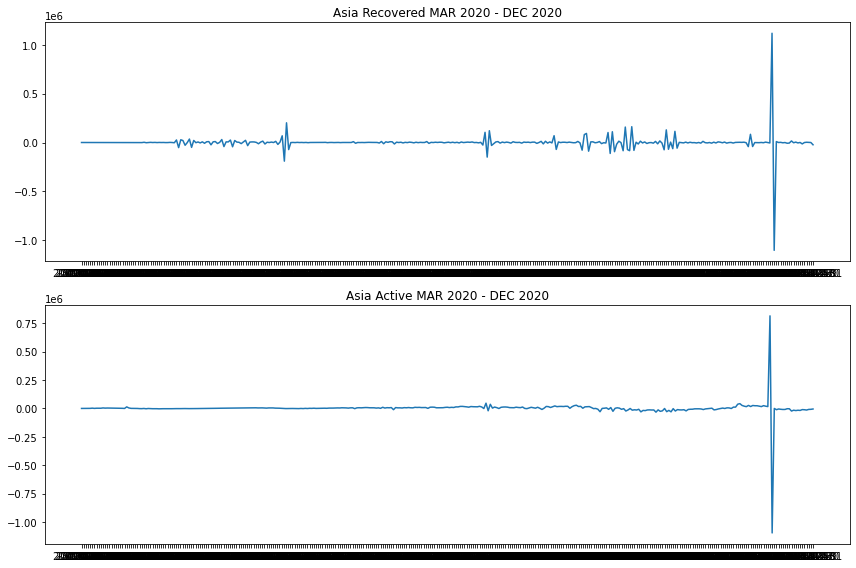

In [16]:
# creating grid for subplots
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(12)

ax1 = plt.subplot2grid(shape=(2, 1), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(2, 1), loc=(1, 0))

# plotting subplots
ax1.plot(asia_recovered)
ax1.set_title('Asia Recovered MAR 2020 - DEC 2020')
ax2.plot(asia_active)
ax2.set_title('Asia Active MAR 2020 - DEC 2020') 

# automatically adjust padding horizontally
# as well as vertically.
plt.tight_layout()

# display plot
plt.show()

In [17]:
eu_df.head()

,country,confirmed,deaths,recovered,active,log_converted_confirmed,log_converted_deaths,log_converted_recovered,log_converted_active
date,,,,,,,,,
2020-03-04,Poland,1,0.0,0.0,1.0,-1.806450,-1.216878,-0.287585,-0.078764
2020-03-04,Poland,1,0.0,0.0,1.0,-1.806450,-1.216878,-0.287585,-0.078764
2020-03-06,Poland,5,0.0,0.0,5.0,-1.385854,-1.216878,-0.287585,-0.078672
2020-03-06,Poland,5,0.0,0.0,5.0,-1.385854,-1.216878,-0.287585,-0.078672
2020-03-08,Poland,11,0.0,0.0,11.0,-1.120526,-1.216878,-0.287585,-0.078530


In [18]:
eu_df = eu_df.groupby('date')[['confirmed', 'deaths', 'recovered', 'active']].sum()
eu_df.head()

,confirmed,deaths,recovered,active
date,,,,
2020-01-24,2,0.0,0.0,2.0
2020-01-25,3,0.0,0.0,3.0
2020-01-26,3,0.0,0.0,3.0
2020-01-27,3,0.0,0.0,3.0
2020-01-28,8,0.0,0.0,8.0


In [19]:
eu_recovered = eu_df.recovered.diff().dropna()
result5 = adfuller(eu_recovered)

In [20]:
print('Europe Sample Recovered ADF Statistic:', result5[0])

print('Europe Sample Recovered p-value:', result5[1])

print('Europe Sample Recovered critical values:', result5[4])

Europe Sample Recovered ADF Statistic: -2.793160181984956
Europe Sample Recovered p-value: 0.05925744913113202
Europe Sample Recovered critical values: {'1%': -3.451281394993741, '5%': -2.8707595072926293, '10%': -2.571682118921643}


In [21]:
eu_active = eu_df.active.diff().diff().dropna()
result6 = adfuller(eu_active)

In [22]:
print('Europe Sample Active ADF Statistic:', result6[0])

print('Europe Sample Active p-value:', result6[1])

print('Europe Sample Active critical values:', result6[4])

Europe Sample Active ADF Statistic: -2.9772212869975134
Europe Sample Active p-value: 0.0370771001565686
Europe Sample Active critical values: {'1%': -3.451148243362826, '5%': -2.8707010565250752, '10%': -2.571650950153748}


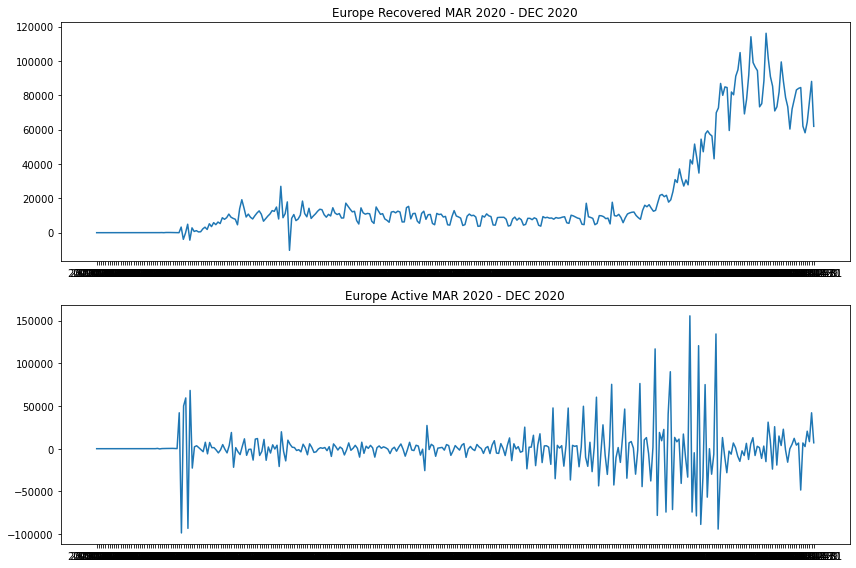

In [23]:
# creating grid for subplots
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(12)

ax1 = plt.subplot2grid(shape=(2, 1), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(2, 1), loc=(1, 0))

# plotting subplots
ax1.plot(eu_recovered)
ax1.set_title('Europe Recovered MAR 2020 - DEC 2020')
ax2.plot(eu_active)
ax2.set_title('Europe Active MAR 2020 - DEC 2020') 

# automatically adjust padding horizontally
# as well as vertically.
plt.tight_layout()

# display plot
plt.show()

In [24]:
noam_df.head()

,country,confirmed,deaths,recovered,active,log_converted_confirmed,log_converted_deaths,log_converted_recovered,log_converted_active
date,,,,,,,,,
2020-01-22,United States,1,0.0,0.0,1.0,-1.80645,-1.216878,-0.287585,-0.078764
2020-01-23,United States,1,0.0,0.0,1.0,-1.80645,-1.216878,-0.287585,-0.078764
2020-01-24,United States,1,0.0,0.0,1.0,-1.80645,-1.216878,-0.287585,-0.078764
2020-01-24,United States,1,0.0,0.0,1.0,-1.80645,-1.216878,-0.287585,-0.078764
2020-01-25,United States,1,0.0,0.0,1.0,-1.80645,-1.216878,-0.287585,-0.078764


In [25]:
noam_df = noam_df.groupby('date')[['confirmed', 'deaths', 'recovered', 'active']].sum()
noam_df.head()

,confirmed,deaths,recovered,active
date,,,,
2020-01-22,1,0.0,0.0,1.0
2020-01-23,1,0.0,0.0,1.0
2020-01-24,2,0.0,0.0,2.0
2020-01-25,2,0.0,0.0,2.0
2020-01-26,6,0.0,0.0,6.0


In [26]:
noam_recovered = noam_df.recovered.diff().dropna()
result7 = adfuller(noam_recovered)

In [27]:
print('North America Sample Recovered ADF Statistic:', result7[0])

print('North America Sample Recovered p-value:', result7[1])

print('North America Sample Recovered critical values:', result7[4])

North America Sample Recovered ADF Statistic: -18.29623567713031
North America Sample Recovered p-value: 2.2916969701462638e-30
North America Sample Recovered critical values: {'1%': -3.4503836022181056, '5%': -2.8703653471616826, '10%': -2.571471939191249}


In [28]:
noam_active = noam_df.active.diff().dropna()
result8 = adfuller(noam_active)

In [29]:
print('North America Sample Active ADF Statistic:', result8[0])

print('North America Sample Active p-value:', result8[1])

print('North America Sample Active critical values:', result8[4])

North America Sample Active ADF Statistic: -17.035734421638047
North America Sample Active p-value: 8.2640393165322e-30
North America Sample Active critical values: {'1%': -3.4503836022181056, '5%': -2.8703653471616826, '10%': -2.571471939191249}


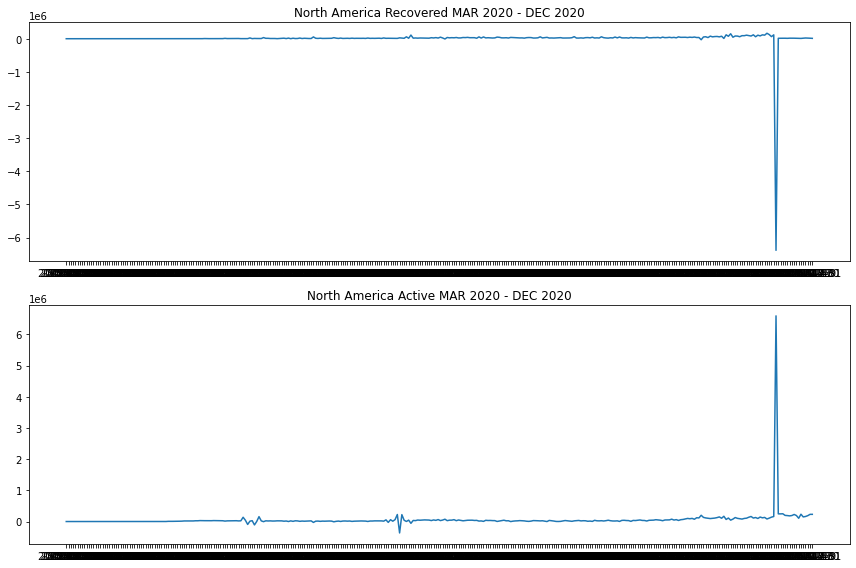

In [30]:
# creating grid for subplots
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(12)

ax1 = plt.subplot2grid(shape=(2, 1), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(2, 1), loc=(1, 0))

# plotting subplots
ax1.plot(noam_recovered)
ax1.set_title('North America Recovered MAR 2020 - DEC 2020')
ax2.plot(noam_active)
ax2.set_title('North America Active MAR 2020 - DEC 2020') 

# automatically adjust padding horizontally
# as well as vertically.
plt.tight_layout()

# display plot
plt.show()

In [31]:
soam_df.head()

,country,confirmed,deaths,recovered,active,log_converted_confirmed,log_converted_deaths,log_converted_recovered,log_converted_active
date,,,,,,,,,
2020-03-03,Chile,1,0.0,0.0,1.0,-1.806450,-1.216878,-0.287585,-0.078764
2020-03-04,Chile,1,0.0,0.0,1.0,-1.806450,-1.216878,-0.287585,-0.078764
2020-03-05,Chile,4,0.0,0.0,4.0,-1.455649,-1.216878,-0.287585,-0.078695
2020-03-05,Chile,4,0.0,0.0,4.0,-1.455649,-1.216878,-0.287585,-0.078695
2020-03-05,Chile,4,0.0,0.0,4.0,-1.455649,-1.216878,-0.287585,-0.078695


In [32]:
soam_df = soam_df.groupby('date')[['confirmed', 'deaths', 'recovered', 'active']].sum()
soam_df.head()

,confirmed,deaths,recovered,active
date,,,,
2020-01-23,0,0.0,0.0,0.0
2020-02-26,3,0.0,0.0,3.0
2020-02-29,8,0.0,0.0,8.0
2020-03-03,1,0.0,0.0,1.0
2020-03-04,9,0.0,0.0,9.0


In [33]:
soam_recovered = soam_df.recovered.diff().dropna()
result8 = adfuller(soam_recovered)

In [34]:
print('South America Sample Recovered ADF Statistic:', result8[0])

print('South America Sample Recovered p-value:', result8[1])

print('South America Sample Recovered critical values:', result8[4])

South America Sample Recovered ADF Statistic: -3.838718211793858
South America Sample Recovered p-value: 0.0025351122846229306
South America Sample Recovered critical values: {'1%': -3.452713099849546, '5%': -2.871387839457783, '10%': -2.5720171933352485}


In [35]:
soam_active = soam_df.active.diff().dropna()
result9 = adfuller(soam_active)

In [36]:
print('South America Sample Recovered ADF Statistic:', result9[0])

print('South America Sample Recovered p-value:', result9[1])

print('South America Sample Recovered critical values:', result9[4])

South America Sample Recovered ADF Statistic: -20.463129611510023
South America Sample Recovered p-value: 0.0
South America Sample Recovered critical values: {'1%': -3.452263435801039, '5%': -2.871190526189069, '10%': -2.571911967527952}


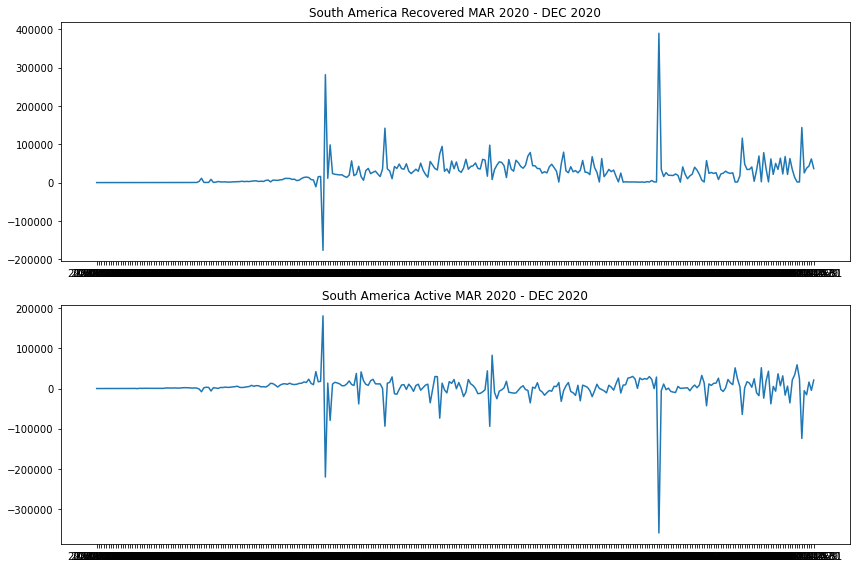

In [37]:
# creating grid for subplots
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(12)

ax1 = plt.subplot2grid(shape=(2, 1), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(2, 1), loc=(1, 0))

# plotting subplots
ax1.plot(soam_recovered)
ax1.set_title('South America Recovered MAR 2020 - DEC 2020')
ax2.plot(soam_active)
ax2.set_title('South America Active MAR 2020 - DEC 2020') 

# automatically adjust padding horizontally
# as well as vertically.
plt.tight_layout()

# display plot
plt.show()

After graphing the difference for a stationary model determining ARMA, AR or MA 

ACF and PACF cannot be used to choose the order of a model when both the orders q and p are non-zero. Instead there are other models the AIC and BIC.

    a. The model with the lower AIC Score makes better predictions 
    

If you recieve a value error this is a bad model for the data. 


The Dickey Fuller adds lagged differences to these models

You must choose a lag length to run the test. The lag length should be chosen so that the residuals aren't serially correlated. To choose the lags: minimize Akaike's information criterion will be used. 

The AIC deals with both the risk of overfitting and the risk of underfitting. 

A p-values of less than 5% means you can reject the null hypothesis that there is a unit root. You can also compare the calculated DF_t statistic with a tabulated critical value. The more negative the DF test statistic , the stronger the evidence for rejecting the null hypothesis of a unit root 

The DF test statistic: (2)

Mathematical Description of AR(1) Model 
R_t = mu + phi(R_t-1) + epselon_t

Since there is only one lagged value on the right hand side, 
this is called an AR model of order 1, or simply an AR(1) model. Or simply 
An AR(1) model  
*AR parameter is phi
    If phi is 1 then the process is a random walk 
    If phi is 0, then the process is white noise

In order for the process to be stable and stationary, phi has to be between 
-1 and +1.

In [74]:
#Arica data
log_af_rec = np.log(af_df['recovered'])
log_af_rec = log_af_rec.replace([np.inf, -np.inf], np.nan).dropna()
log_af_rec.to_csv("../data/log_af_rec.csv")
log_af_act = np.log(af_df['active'])
log_af_act = log_af_act.replace([np.inf, -np.inf], np.nan).dropna()
log_af_act.to_csv("../data/log_af_act.csv")

In [75]:
#Asia data
log_asia_rec = np.log(asia_df['recovered'])
log_asia_rec = log_asia_rec.replace([np.inf, -np.inf], np.nan).dropna()
log_asia_rec.to_csv("../data/log_asia_rec.csv")
log_asia_act = np.log(asia_df['active'])
log_asia_act = log_asia_act.replace([np.inf, -np.inf], np.nan).dropna()
log_asia_act.to_csv("../data/log_asia_act.csv")

In [76]:
#Europe data 
log_eu_rec = np.log(eu_df['recovered'])
log_eu_rec = log_eu_rec.replace([np.inf, -np.inf], np.nan).dropna()
log_eu_rec.to_csv("../data/log_eu_rec.csv")
log_eu_act = np.log(eu_df['active'])
log_eu_act = log_eu_act.replace([np.inf, -np.inf], np.nan).dropna()
log_eu_act.to_csv("../data/log_eu_act.csv")

In [78]:
#North America data
log_noam_rec = np.log(noam_df['recovered'])
log_noam_rec = log_noam_rec.replace([np.inf, -np.inf], np.nan).dropna()
log_noam_rec.to_csv("../data/log_noam_rec.csv")
log_noam_act = np.log(noam_df['active'])
log_noam_act = log_noam_act.replace([np.inf, -np.inf], np.nan).dropna()
log_noam_act.to_csv("../data/log_noam_act.csv")

In [79]:
#South America data
log_soam_rec = np.log(soam_df['recovered'])
log_soam_rec = log_soam_rec.replace([np.inf, -np.inf], np.nan).dropna()
log_soam_rec.to_csv("../data/log_soam_rec.csv")
log_soam_act = np.log(soam_df['active'])
log_soam_act = log_soam_act.replace([np.inf, -np.inf], np.nan).dropna()
log_soam_act.to_csv("../data/log_soam_act.csv")

In [43]:
###Function modified from Cowboy Cigarettes Case Study 

# Make a function called evaluate_arima_model to find the MSE of a single ARIMA model 
def evaluate_arima_model(data, arima_order):
    # Needs to be an integer because it is later used as an index.
    # Use int()
    split=int(len(data) * 0.8) 
    # Make train and test variables, with 'train, test'
    train, test = data[0:split], data[split:len(data)]
    past=[x for x in train]
    # make predictions. Declare a variable with that name
    predictions = list()
    for i in range(len(test)):#timestep-wise comparison between test data and one-step prediction ARIMA model. 
        model = ARIMA(past, order=arima_order)
        model_fit = model.fit(disp=0)
        future = model_fit.forecast()[0]
        # Append() here
        predictions.append(future)
        past.append(test[i])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    # Return the error
    return error

In [44]:
###Function modified from Cowboy Cigarettes Case Study 

# Make a function called evaluate_models to evaluate different ARIMA models with several different p, d, and q values.
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    # Iterate through p_values
    for p in p_values:
        # Iterate through d_values
        for d in d_values:
            # Iterate through q_values
            for q in q_values:
                # p, d, q iterator variables in that order
                order = (p, d, q)
                try:
                    # Make a variable called mse for the Mean squared error
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    return print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [45]:
# Now, we choose a couple of values to try for each parameter: p_values, d_values and q_values
# Fill in the blanks as appropriate
p_values = [x for x in range(0, 3)]
d_values = [x for x in range(0, 3)]
q_values = [x for x in range(0, 3)]

In [52]:
# # monkey patch around bug in ARIMA class
# def __getnewargs__(self):
# 	return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))
# ARIMA.__getnewargs__ = __getnewargs__




def pickle_best_model(data, arima_order, filename):

    # Save Model Using Pickle
    split=int(len(data) * 0.8) 

    # Make train and test variables, with 'train, test'
    train, test = data[0:split], data[split:len(data)]
    past=[x for x in train]
    # Fit the model on training set with best order
    model = ARIMA(past, order=arima_order)
    model_fit = model.fit(disp=0)
    model_fit.version = '1.0'
    model_fit.pandas_version = pd.__version__
    model_fit.numpy_version = np.__version__
    model_fit.sklearn_version = sklearn_version
    model_fit.statsmodels_version = statsmodels_version
    model_fit.build_datetime = datetime.datetime.now()
    
    # save the model to disk - write binary
    ##filename = 'finalized_model.sav'
    pickle.dump(model_fit, open(filename, 'wb'))
 


In [47]:
# Find the optimum ARIMA model for our Africa recovered sample.

import warnings
warnings.filterwarnings("ignore")
evaluate_models(log_af_rec, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=12.565
ARIMA(0, 0, 1) MSE=3.155
ARIMA(0, 0, 2) MSE=0.888
ARIMA(0, 1, 0) MSE=0.001
ARIMA(0, 1, 1) MSE=0.001
ARIMA(0, 1, 2) MSE=0.001
ARIMA(0, 2, 0) MSE=0.000
ARIMA(0, 2, 1) MSE=0.000
ARIMA(0, 2, 2) MSE=0.000
ARIMA(1, 0, 0) MSE=0.000
ARIMA(1, 0, 1) MSE=0.000
ARIMA(1, 0, 2) MSE=0.000
ARIMA(1, 1, 0) MSE=0.001
ARIMA(1, 1, 1) MSE=0.000
ARIMA(1, 1, 2) MSE=0.000
ARIMA(1, 2, 0) MSE=0.000
ARIMA(1, 2, 1) MSE=0.000
ARIMA(1, 2, 2) MSE=0.000
ARIMA(2, 0, 0) MSE=0.000
ARIMA(2, 0, 1) MSE=0.000
ARIMA(2, 0, 2) MSE=0.000
ARIMA(2, 1, 0) MSE=0.000
ARIMA(2, 1, 1) MSE=0.000
ARIMA(2, 1, 2) MSE=0.000
ARIMA(2, 2, 0) MSE=0.000
ARIMA(2, 2, 1) MSE=0.000
ARIMA(2, 2, 2) MSE=0.000
Best ARIMA(2, 2, 0) MSE=0.000


In [55]:
pickle_best_model(log_af_rec, (2, 2, 0), '../models/af_rec_model.sav')

In [56]:
# Find the optimum ARIMA model for our Africa active sample.
evaluate_models(log_af_act, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=5.938
ARIMA(0, 0, 1) MSE=1.524
ARIMA(0, 1, 0) MSE=0.003
ARIMA(0, 1, 1) MSE=0.002
ARIMA(0, 1, 2) MSE=0.002
ARIMA(0, 2, 0) MSE=0.001
ARIMA(0, 2, 1) MSE=0.000
ARIMA(0, 2, 2) MSE=0.000
ARIMA(1, 0, 0) MSE=0.001
ARIMA(1, 0, 1) MSE=0.001
ARIMA(1, 0, 2) MSE=0.001
ARIMA(1, 1, 0) MSE=0.001
ARIMA(1, 1, 1) MSE=0.001
ARIMA(1, 2, 0) MSE=0.001
ARIMA(1, 2, 1) MSE=0.000
ARIMA(1, 2, 2) MSE=0.000
ARIMA(2, 0, 0) MSE=0.001
ARIMA(2, 0, 1) MSE=0.000
ARIMA(2, 1, 0) MSE=0.001
ARIMA(2, 2, 0) MSE=0.001
ARIMA(2, 2, 1) MSE=0.000
ARIMA(2, 2, 2) MSE=0.000
Best ARIMA(0, 2, 1) MSE=0.000


In [57]:
pickle_best_model(log_af_act, (0, 2, 1), '../models/af_act_model.sav')

In [58]:
# Find the optimum ARIMA model for our Asia recovered sample.
evaluate_models(log_asia_rec, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=10.530
ARIMA(0, 0, 1) MSE=2.744
ARIMA(0, 0, 2) MSE=0.878
ARIMA(0, 1, 0) MSE=0.001
ARIMA(0, 1, 1) MSE=0.002
ARIMA(0, 1, 2) MSE=0.001
ARIMA(0, 2, 0) MSE=0.000
ARIMA(0, 2, 1) MSE=0.000
ARIMA(0, 2, 2) MSE=0.000
ARIMA(1, 0, 0) MSE=0.000
ARIMA(1, 0, 1) MSE=0.000
ARIMA(1, 0, 2) MSE=0.000
ARIMA(1, 1, 0) MSE=0.002
ARIMA(1, 1, 1) MSE=0.000
ARIMA(1, 1, 2) MSE=0.000
ARIMA(1, 2, 0) MSE=0.000
ARIMA(1, 2, 2) MSE=0.000
ARIMA(2, 0, 0) MSE=0.000
ARIMA(2, 0, 1) MSE=0.000
ARIMA(2, 1, 0) MSE=0.001
ARIMA(2, 1, 2) MSE=0.000
ARIMA(2, 2, 0) MSE=0.000
ARIMA(2, 2, 1) MSE=0.000
ARIMA(2, 2, 2) MSE=0.000
Best ARIMA(1, 1, 1) MSE=0.000


In [59]:
pickle_best_model(log_asia_rec, (1, 1, 1), '../models/asia_rec_model.sav')

In [60]:
# Find the optimum ARIMA model for our Asia active sample.
evaluate_models(log_asia_act, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=1.730
ARIMA(0, 0, 1) MSE=0.580
ARIMA(0, 1, 0) MSE=0.018
ARIMA(0, 1, 1) MSE=0.027
ARIMA(0, 1, 2) MSE=0.033
ARIMA(0, 2, 0) MSE=0.048
ARIMA(0, 2, 1) MSE=0.023
ARIMA(0, 2, 2) MSE=0.024
ARIMA(1, 0, 0) MSE=0.017
ARIMA(1, 0, 1) MSE=0.027
ARIMA(1, 0, 2) MSE=0.033
ARIMA(1, 1, 0) MSE=0.033
ARIMA(1, 1, 2) MSE=0.024
ARIMA(1, 2, 0) MSE=0.035
ARIMA(1, 2, 1) MSE=0.031
ARIMA(1, 2, 2) MSE=0.031
ARIMA(2, 0, 0) MSE=0.034
ARIMA(2, 1, 0) MSE=0.033
ARIMA(2, 1, 1) MSE=0.031
ARIMA(2, 1, 2) MSE=0.031
ARIMA(2, 2, 0) MSE=0.036
ARIMA(2, 2, 1) MSE=0.032
ARIMA(2, 2, 2) MSE=0.030
Best ARIMA(1, 0, 0) MSE=0.017


In [61]:
pickle_best_model(log_asia_act, (1, 0, 0), '../models/asia_act_model.sav')

In [62]:
# Find the optimum ARIMA model for our Europe recovered sample.
evaluate_models(log_eu_rec, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=6.181
ARIMA(0, 0, 1) MSE=1.815
ARIMA(0, 0, 2) MSE=0.667
ARIMA(0, 1, 0) MSE=0.001
ARIMA(0, 1, 1) MSE=0.003
ARIMA(0, 1, 2) MSE=0.002
ARIMA(0, 2, 0) MSE=0.000
ARIMA(0, 2, 1) MSE=0.002
ARIMA(0, 2, 2) MSE=0.001
ARIMA(1, 0, 0) MSE=0.002
ARIMA(1, 0, 1) MSE=0.002
ARIMA(1, 0, 2) MSE=0.002
ARIMA(1, 1, 0) MSE=0.002
ARIMA(1, 1, 1) MSE=0.002
ARIMA(1, 1, 2) MSE=0.002
ARIMA(1, 2, 0) MSE=0.000
ARIMA(1, 2, 2) MSE=0.002
ARIMA(2, 0, 0) MSE=0.001
ARIMA(2, 0, 1) MSE=0.002
ARIMA(2, 0, 2) MSE=0.002
ARIMA(2, 1, 0) MSE=0.002
ARIMA(2, 2, 0) MSE=0.000
ARIMA(2, 2, 1) MSE=0.004
ARIMA(2, 2, 2) MSE=0.002
Best ARIMA(1, 2, 0) MSE=0.000


In [63]:
pickle_best_model(log_eu_rec, (1, 2, 0), '../models/eu_rec_model.sav')

In [64]:
# Find the optimum ARIMA model for our Europe active sample.
evaluate_models(log_eu_act, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=10.267
ARIMA(0, 0, 1) MSE=3.105
ARIMA(0, 0, 2) MSE=1.433
ARIMA(0, 1, 0) MSE=0.002
ARIMA(0, 1, 1) MSE=0.009
ARIMA(0, 1, 2) MSE=0.009
ARIMA(0, 2, 0) MSE=0.000
ARIMA(0, 2, 1) MSE=0.003
ARIMA(0, 2, 2) MSE=0.002
ARIMA(1, 0, 0) MSE=0.007
ARIMA(1, 0, 1) MSE=0.003
ARIMA(1, 0, 2) MSE=0.003
ARIMA(1, 1, 0) MSE=0.003
ARIMA(1, 1, 1) MSE=0.009
ARIMA(1, 1, 2) MSE=0.009
ARIMA(1, 2, 0) MSE=0.000
ARIMA(2, 0, 0) MSE=0.003
ARIMA(2, 0, 1) MSE=0.003
ARIMA(2, 0, 2) MSE=0.003
ARIMA(2, 1, 0) MSE=0.005
ARIMA(2, 1, 1) MSE=0.008
ARIMA(2, 1, 2) MSE=0.008
ARIMA(2, 2, 0) MSE=0.000
Best ARIMA(2, 2, 0) MSE=0.000


In [65]:
pickle_best_model(log_eu_act, (2, 2, 0), '../models/eu_act_model.sav')

In [66]:
# Find the optimum ARIMA model for our North America recovered sample.
evaluate_models(log_noam_rec, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=7.481
ARIMA(0, 0, 1) MSE=2.075
ARIMA(0, 1, 0) MSE=0.053
ARIMA(0, 1, 1) MSE=0.057
ARIMA(0, 1, 2) MSE=0.062
ARIMA(0, 2, 0) MSE=0.102
ARIMA(0, 2, 1) MSE=0.050
ARIMA(0, 2, 2) MSE=0.053
ARIMA(1, 0, 0) MSE=0.050
ARIMA(1, 0, 1) MSE=0.051
ARIMA(1, 0, 2) MSE=0.053
ARIMA(1, 1, 0) MSE=0.054
ARIMA(1, 1, 1) MSE=0.054
ARIMA(1, 1, 2) MSE=0.062
ARIMA(1, 2, 0) MSE=0.077
ARIMA(1, 2, 1) MSE=0.051
ARIMA(2, 0, 0) MSE=0.050
ARIMA(2, 0, 2) MSE=0.054
ARIMA(2, 1, 0) MSE=0.060
ARIMA(2, 1, 1) MSE=0.060
ARIMA(2, 1, 2) MSE=0.063
ARIMA(2, 2, 0) MSE=0.072
ARIMA(2, 2, 1) MSE=0.054
Best ARIMA(1, 0, 0) MSE=0.050


In [67]:
pickle_best_model(log_noam_rec, (1, 0, 0), '../models/noam_rec_model.sav')

In [68]:
# Find the optimum ARIMA model for our North America active sample.
evaluate_models(log_noam_act, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=9.530
ARIMA(0, 0, 1) MSE=2.753
ARIMA(0, 0, 2) MSE=0.969
ARIMA(0, 1, 0) MSE=0.005
ARIMA(0, 1, 1) MSE=0.009
ARIMA(0, 1, 2) MSE=0.009
ARIMA(0, 2, 0) MSE=0.007
ARIMA(0, 2, 1) MSE=0.008
ARIMA(0, 2, 2) MSE=0.008
ARIMA(1, 0, 0) MSE=0.005
ARIMA(1, 0, 1) MSE=0.006
ARIMA(1, 0, 2) MSE=0.006
ARIMA(1, 1, 0) MSE=0.006
ARIMA(1, 1, 1) MSE=0.009
ARIMA(1, 1, 2) MSE=0.009
ARIMA(1, 2, 0) MSE=0.006
ARIMA(2, 0, 0) MSE=0.006
ARIMA(2, 0, 1) MSE=0.006
ARIMA(2, 0, 2) MSE=0.007
ARIMA(2, 1, 0) MSE=0.008
ARIMA(2, 1, 1) MSE=0.009
ARIMA(2, 1, 2) MSE=0.009
ARIMA(2, 2, 0) MSE=0.005
ARIMA(2, 2, 1) MSE=0.015
Best ARIMA(0, 1, 0) MSE=0.005


In [69]:
pickle_best_model(log_noam_act, (0, 1, 0), '../models/noam_act_model.sav')

In [70]:
# Find the optimum ARIMA model for our South America recovered sample.
evaluate_models(log_soam_rec, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=7.312
ARIMA(0, 0, 1) MSE=1.926
ARIMA(0, 0, 2) MSE=0.598
ARIMA(0, 1, 0) MSE=0.003
ARIMA(0, 1, 1) MSE=0.003
ARIMA(0, 1, 2) MSE=0.003
ARIMA(0, 2, 0) MSE=0.000
ARIMA(0, 2, 1) MSE=0.000
ARIMA(0, 2, 2) MSE=0.000
ARIMA(1, 0, 0) MSE=0.000
ARIMA(1, 0, 1) MSE=0.000
ARIMA(1, 0, 2) MSE=0.000
ARIMA(1, 1, 0) MSE=0.003
ARIMA(1, 1, 1) MSE=0.001
ARIMA(1, 1, 2) MSE=0.000
ARIMA(1, 2, 0) MSE=0.000
ARIMA(1, 2, 1) MSE=0.000
ARIMA(1, 2, 2) MSE=0.000
ARIMA(2, 0, 0) MSE=0.000
ARIMA(2, 0, 1) MSE=0.000
ARIMA(2, 1, 0) MSE=0.002
ARIMA(2, 1, 1) MSE=0.000
ARIMA(2, 2, 0) MSE=0.000
ARIMA(2, 2, 1) MSE=0.000
ARIMA(2, 2, 2) MSE=0.000
Best ARIMA(2, 2, 0) MSE=0.000


In [71]:
pickle_best_model(log_soam_rec, (2, 2, 0), '../models/soam_rec_model.sav')

In [72]:
# Find the optimum ARIMA model for our South America active sample.
evaluate_models(log_soam_act, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=1.820
ARIMA(0, 0, 1) MSE=0.516
ARIMA(0, 0, 2) MSE=0.222
ARIMA(0, 1, 0) MSE=0.004
ARIMA(0, 1, 1) MSE=0.005
ARIMA(0, 1, 2) MSE=0.005
ARIMA(0, 2, 0) MSE=0.005
ARIMA(0, 2, 1) MSE=0.005
ARIMA(0, 2, 2) MSE=0.007
ARIMA(1, 0, 0) MSE=0.002
ARIMA(1, 0, 1) MSE=0.003
ARIMA(1, 0, 2) MSE=0.003
ARIMA(1, 1, 0) MSE=0.005
ARIMA(1, 1, 1) MSE=0.005
ARIMA(1, 1, 2) MSE=0.005
ARIMA(1, 2, 0) MSE=0.004
ARIMA(1, 2, 1) MSE=0.004
ARIMA(1, 2, 2) MSE=0.007
ARIMA(2, 0, 0) MSE=0.003
ARIMA(2, 0, 1) MSE=0.003
ARIMA(2, 0, 2) MSE=0.003
ARIMA(2, 1, 0) MSE=0.005
ARIMA(2, 1, 1) MSE=0.005
ARIMA(2, 1, 2) MSE=0.005
ARIMA(2, 2, 0) MSE=0.005
ARIMA(2, 2, 1) MSE=0.005
ARIMA(2, 2, 2) MSE=0.007
Best ARIMA(1, 0, 0) MSE=0.002


In [73]:
pickle_best_model(log_soam_act, (1, 0, 0), '../models/soam_act_model.sav')